# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [32]:

df = pd.read_csv("states_edu.csv")
print(df)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [33]:
df.rename(columns={
    'PRIMARY_KEY': 'Primary_Key',
    'STATE': 'State',
    'YEAR': 'Year',
    'ENROLL': 'Enroll',
    'TOTAL_REVENUE': 'Total_Revenue',
    'FEDERAL_REVENUE': 'Federal_Revenue',
    'STATE_REVENUE': 'State_Revenue',
    'LOCAL_REVENUE': 'Local_Revenue',
    'TOTAL_EXPENDITURE': 'Total_Expenditure',
    'GRADES_1_8_G': 'Grades_1_8_G',
    'GRADES_9_12_G': 'Grades_9_12_G',
    'GRADES_ALL_G': 'Grades_All_G',
    'AVG_MATH_4_SCORE': 'Avg_Math_4_Score',
    'AVG_MATH_8_SCORE': 'Avg_Math_8_Score',
    'AVG_READING_4_SCORE': 'Avg_Reading_4_Score',
    'AVG_READING_8_SCORE': 'Avg_Reading_8_Score'
}, inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [34]:
differentyears = df['Year'].nunique()
# Display the result
print(differentyears)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [35]:
michigan_data = df[df['State'] == 'MICHIGAN']
ohio_data = df[df['State'] == 'OHIO']

averagemichigan = michigan_data['Avg_Math_4_Score'].mean()
averageohio = ohio_data['Avg_Math_4_Score'].mean()

print(f"Average math score for 4th-grade students in Michigan: {averagemichigan}")
print(f"Average math score for 4th-grade students in Ohio: {averageohio}")

if averagemichigan > averageohio:
    print("Michigan has a higher average.")
elif averageohio > averagemichigan:
    print("Ohio has a higher average.")
else:
    print("The average scores are the same for both states.")

Average math score for 4th-grade students in Michigan: 234.36363636363637
Average math score for 4th-grade students in Ohio: 239.45454545454547
Ohio has a higher average.


Find the average for your chosen test across all states in 2019

In [44]:
data2019 = df[df['Year'] == 2019]

# Calculate the average reading scores for 4th-grade students across all states in 2019
math2019 = data2019['Avg_Math_8_Score'].mean()

# Display the result
print(f"Average math score of 8th graders in 2019: {math2019}")

Average math score of 8th graders in 2019: 281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [45]:
maxmath = df.groupby('State')['Avg_Math_8_Score'].max()

# Display the result
print("Maximum math scores of 8th graders for each state:")
print(maxmath)

Maximum math scores of 8th graders for each state:
State
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [54]:
df['Expenditure_Per_Student'] = df['Total_Expenditure'] / df['Enroll']

low_threshold = 500000
medium_lower_threshold = 500000
medium_upper_threshold = 1000000
high_threshold = 1000000

df['Enrollment_Level'] = pd.cut(df['Enroll'],bins=[-float('inf'), low_threshold, 
                        medium_upper_threshold, float('inf')],labels=['Low', 'Medium', 'High'])

df['Year_Category'] = pd.cut(df['Year'],bins=[1980, 1990, 2000, 2010, 2020],
                        labels=['1980s', '1990s', '2000s', '2010s'])


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

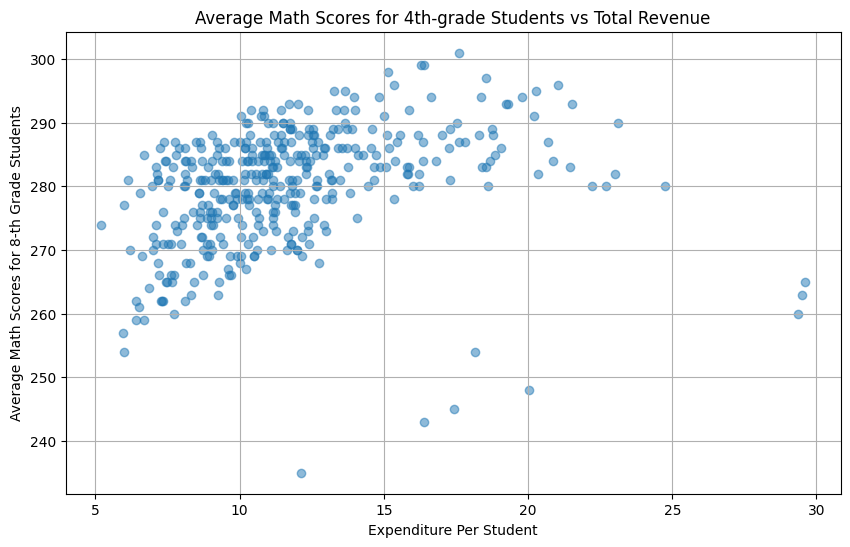

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Expenditure_Per_Student'], df['Avg_Math_8_Score'], alpha=0.5)
plt.title('Average Math Scores for 4th-grade Students vs Total Revenue')
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Math Scores for 8-th Grade Students')
plt.grid(True)
plt.show()


**When the expenditure per student increases, the average math scores increase as well.**


**Visualization 2**

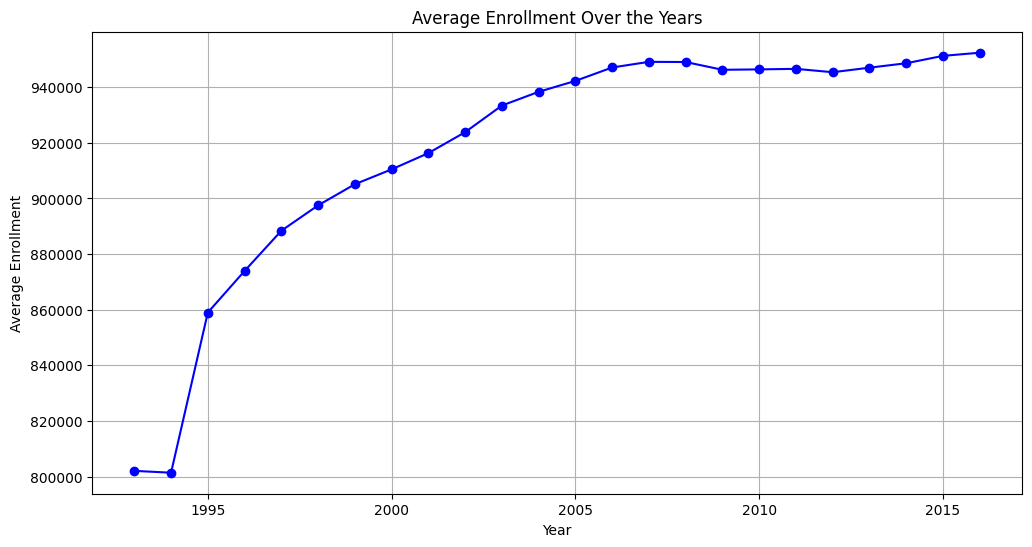

In [57]:
mean_enrollment_by_year = df.groupby('Year')['Enroll'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(mean_enrollment_by_year['Year'], mean_enrollment_by_year['Enroll'], marker='o', linestyle='-', color='b')
plt.title('Average Enrollment Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Enrollment')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [64]:
from sklearn.model_selection import train_test_split

In [72]:
df = df.dropna()
# Selecting predictor variables
X = df[['Total_Revenue', 'Expenditure_Per_Student']]

# Selecting the target variable
y = df['Avg_Math_8_Score']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [66]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
# create your model here
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

# Predictions on the testing set


<bound method LinearRegression.fit of LinearRegression()>


In [69]:

y_pred = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(mse)

54.628603771445825


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [73]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Displaying the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 54.628603771445825
Root Mean Squared Error (RMSE): 7.391116544301397


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

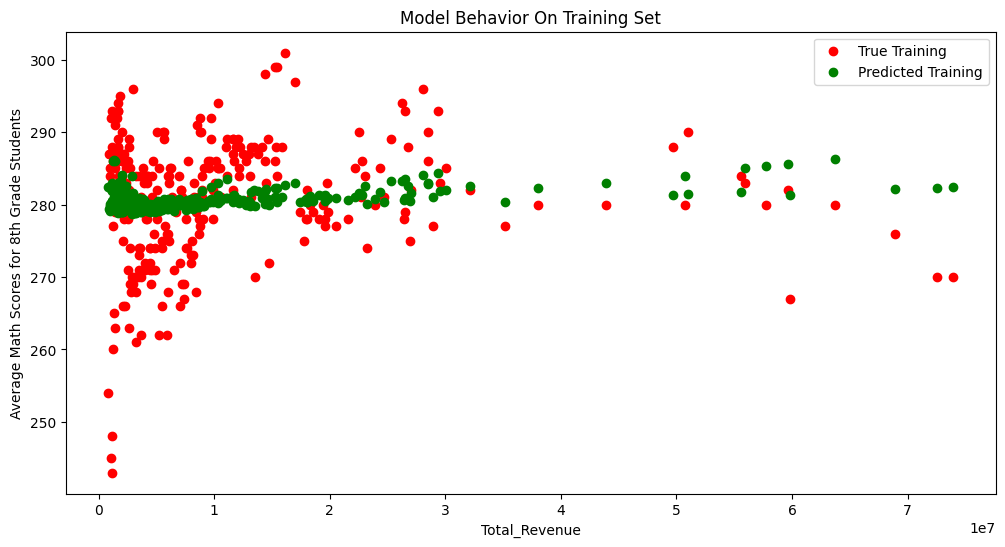

In [78]:
    # col_name = 'COLUMN NAME OF ONE PREDICTOR'
col_name = 'Total_Revenue'



# Plotting the model's performance on the training set
plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red", label="True Training")
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label="Predicted Training")
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math Scores for 8th Grade Students')  # Modify this line to reflect the name of the predictor
plt.title("Model Behavior On Training Set")
plt.show()

    # f = plt.figure(figsize=(12,6))
    # plt.scatter(X_train[col_name], y_train, color = "red")
    # plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

    # plt.legend(['True Training','Predicted Training'])
    # plt.xlabel(col_name)
    # plt.ylabel('NAME OF THE PREDICTOR')
    # plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

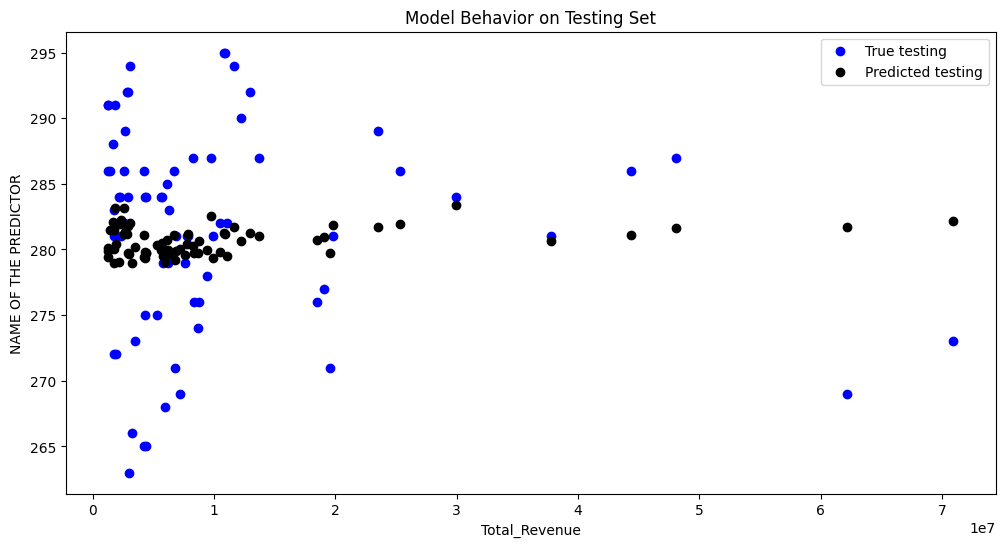

In [79]:
col_name = "Total_Revenue"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In order to do my model, I needed to drop the NaN values. It appears that when those values are dropped, my model has a lot less variance than what the real testing appears to be.**